In [51]:
from PIL import Image
import numpy as np

Если библиотека PIL не импортируется, установите её с помощью команды ниже и перезапустите блокнот.

In [52]:
!pip install Pillow
# либо для одного текущего пользователя:
!pip install --user Pillow


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Загрузите картинку с помощью команды open. Если необходимо, можете изменить размер картинки с помощью метода resize.

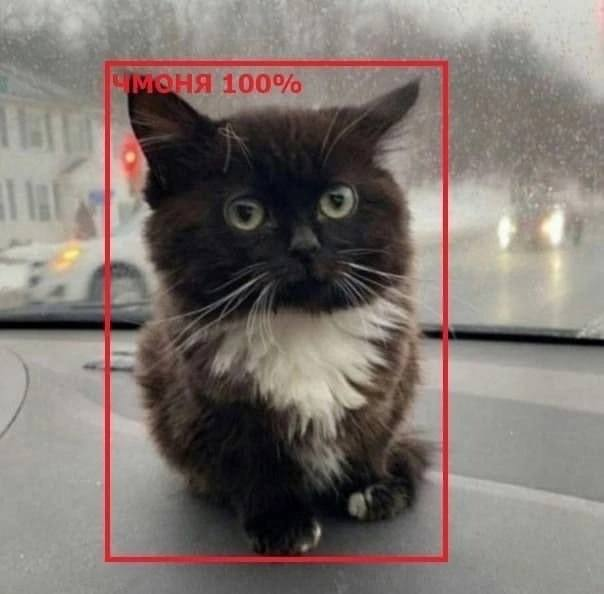

In [53]:
img = Image.open('chmonya.jpg')#.resize(())
img

Преобразуйте картинку из объекта класса PIL в Numpy массив.

In [54]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [55]:
x.shape

(594, 604, 3)

Видно, что исходная цветная картинка содержит три канала - RGB. Преобразуем её в одноканальную либо с помощью специальной функции rgb2gray либо обычным усреднением по трём каналам.

In [56]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

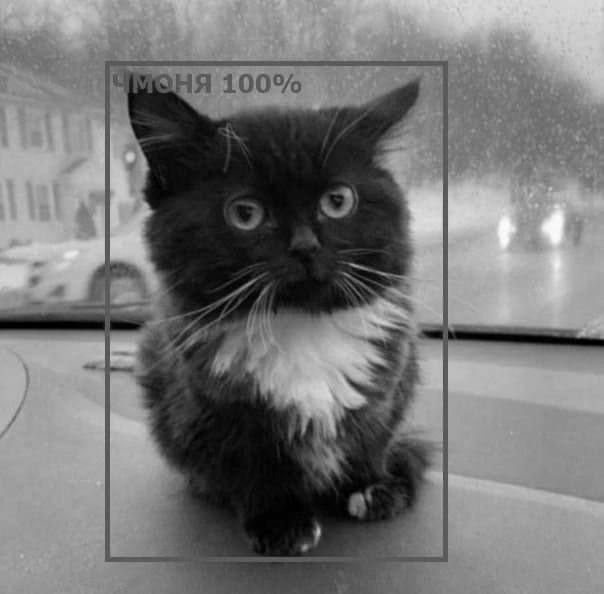

In [57]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

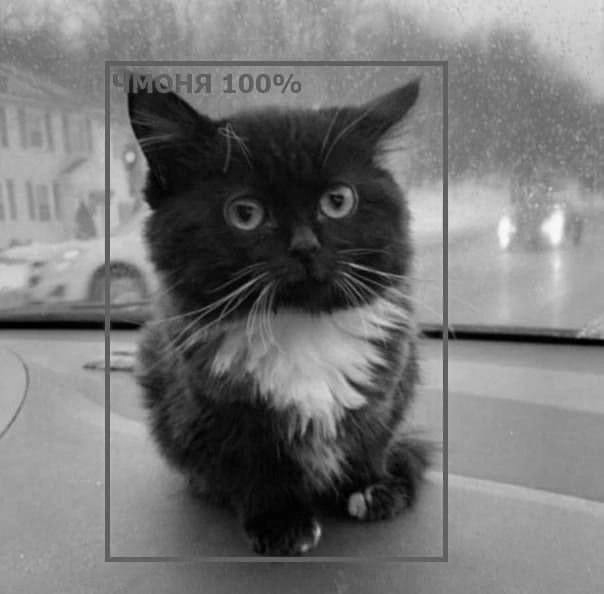

In [58]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

Дальше будем работать с одноканальной картинкой, т.е. двумерной матрицей.

In [59]:
#y = rgb2gray(x)
y = x.mean(axis=2)
y

array([[173.     , 175.     , 176.     , ..., 215.66667, 211.     ,
        207.     ],
       [173.     , 175.     , 176.     , ..., 214.66667, 210.     ,
        206.     ],
       [173.     , 175.     , 176.     , ..., 213.66667, 209.     ,
        206.     ],
       ...,
       [147.     , 147.66667, 148.     , ..., 145.33333, 145.33333,
        145.33333],
       [145.66667, 144.     , 144.66667, ..., 147.     , 147.     ,
        147.     ],
       [145.     , 144.     , 144.     , ..., 147.     , 147.     ,
        147.     ]], dtype=float32)

In [60]:
y.shape

(594, 604)

Сделаем SVD разложение

In [61]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [62]:
U.shape

(594, 594)

In [63]:
V.shape

(594, 604)

Проверим что разложение корректное, соберём его обратно, перемножив матрицы

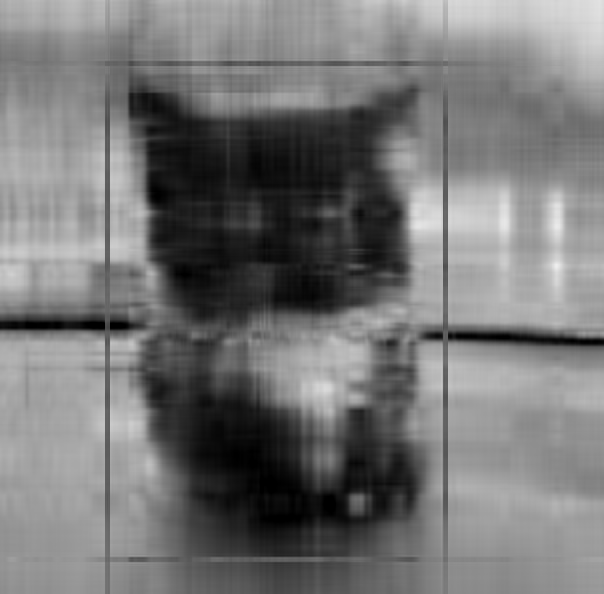

In [79]:
r = 10

Y_full = U[:,:r].dot(np.diag(S[:r])).dot(V[:r,:])
Y_full[Y_full>255] = 255
Y_full[Y_full<0] = 0
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

PIL объект можно при необходимости сохранить в файл на диск

In [78]:
Image.fromarray(np.asarray(Y_full, dtype=np.uint8)).save(f'full_rank.png')

**Задание для самостоятельной работы:**  
1. Рассмотреть малоранговые разложения
2. Получить картинки для разного значения ранга
3. Сохранить несколько картинок на диск
4. Сделать выводы

**Подсказки:**  
Не забудьте при преобразовании Numpy массива в объект PIL преобразовывать тип элементов в np.uint8.  
Если число находится вне диапазона [0, 255], сделайте клиппирование - все числа больше 255 приравняйте числу 255, все отрицательные числа сделайте равными нулю.